<a href="https://colab.research.google.com/github/riamary18/Text-Detection-from-Images/blob/main/Text_Detection_from_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import zipfile

from glob import glob
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
plt.style.use('ggplot')

##Outline:
 1. Explore the data
 2. Extract text from images using 3 different methods:
  * pytesseract
  * easyocr
  * keras_ocr
 3. Test a few examples and compare the results

###Installing pytesseract and tesseract-OCR, easyocr and keras_ocr

In [17]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 23 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,339 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [18]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 18.9 MB/s eta 0:00:00


In [19]:
!pip install keras-ocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.5 MB/s eta 0:00:00


##Extracting and Analysing Dataset

In [40]:
zipref=zipfile.ZipFile('drive/MyDrive/Text Detection/textocr.zip')
zipref.extractall('drive/MyDrive/Text Detection/textocr')
zipref.close()

In [2]:
annot=pd.read_parquet('drive/MyDrive/Text Detection/textocr/annot.parquet')
annot.head()

id          image_id                           bbox  \
0  a4ea732cd3d5948a_1  a4ea732cd3d5948a   [525.83, 3.4, 197.64, 33.94]   
1  a4ea732cd3d5948a_2  a4ea732cd3d5948a  [534.67, 64.68, 91.22, 38.19]   
2  a4ea732cd3d5948a_3  a4ea732cd3d5948a  [626.95, 63.62, 96.52, 31.82]   
3  a4ea732cd3d5948a_4  a4ea732cd3d5948a  [577.4, 141.87, 147.13, 43.1]   
4  a4ea732cd3d5948a_5  a4ea732cd3d5948a  [391.03, 163.9, 60.82, 38.65]   

   utf8_string                                             points     area  
0  Performance  [525.83, 3.4, 723.47, 7.29, 722.76, 36.99, 525...  6707.90  
1        Sport  [535.73, 64.68, 623.41, 67.51, 625.89, 102.87,...  3483.69  
2        Watch  [626.95, 63.62, 721.7, 63.62, 723.47, 95.44, 6...  3071.27  
3   ...period.  [580.02, 143.61, 724.53, 141.87, 723.66, 184.9...  6341.30  
4            .  [395.2, 163.9, 451.85, 191.94, 445.59, 202.55,...  2350.69

In [3]:
imgs=pd.read_parquet('drive/MyDrive/Text Detection/textocr/img.parquet')
imgs.head()

id  width  height    set                   file_name
0  a4ea732cd3d5948a    840    1024  train  train/a4ea732cd3d5948a.jpg
1  4bf43a7b2a898044   1024     683  train  train/4bf43a7b2a898044.jpg
2  1b55b309b0f50d02   1024     683  train  train/1b55b309b0f50d02.jpg
3  00c359f294f7dcd9   1024     680  train  train/00c359f294f7dcd9.jpg
4  04b5a37f762b0f51    768    1024  train  train/04b5a37f762b0f51.jpg

In [7]:
img_filenames=glob('drive/MyDrive/Text Detection/textocr/train_val_images/train_images/*')
img_filenames[:10]

['drive/MyDrive/Text Detection/textocr/train_val_images/train_images/f310859f6e1c9fa0.jpg',
 'drive/MyDrive/Text Detection/textocr/train_val_images/train_images/f314ab17bd6f0d98.jpg',
 'drive/MyDrive/Text Detection/textocr/train_val_images/train_images/f317ca8ea185a765.jpg',
 'drive/MyDrive/Text Detection/textocr/train_val_images/train_images/f3184402bf13cf59.jpg',
 'drive/MyDrive/Text Detection/textocr/train_val_images/train_images/f3192eff16d9c8ab.jpg',
 'drive/MyDrive/Text Detection/textocr/train_val_images/train_images/f31e2006553c6e20.jpg',
 'drive/MyDrive/Text Detection/textocr/train_val_images/train_images/f3222417817e8c70.jpg',
 'drive/MyDrive/Text Detection/textocr/train_val_images/train_images/f32294869bf091b1.jpg',
 'drive/MyDrive/Text Detection/textocr/train_val_images/train_images/f325d1fea61f50c7.jpg',
 'drive/MyDrive/Text Detection/textocr/train_val_images/train_images/f329cb9e4c415439.jpg']

##Plot Example Images

In [8]:
image_id=img_filenames[1].split('/')[-1].split('.')[0]

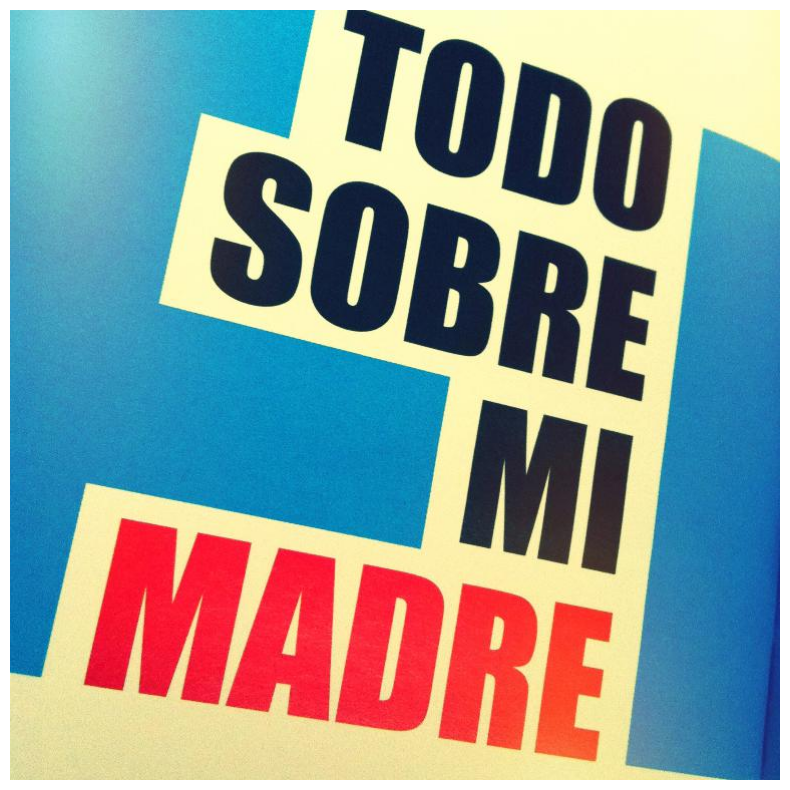

In [9]:
fig,ax=plt.subplots(figsize=(10,10))
ax.imshow(plt.imread(img_filenames[1]))
ax.axis('off')
plt.show()

In [10]:
annot.query('image_id==@image_id')

id          image_id  \
295742  f314ab17bd6f0d98_1  f314ab17bd6f0d98   
295743  f314ab17bd6f0d98_2  f314ab17bd6f0d98   
295744  f314ab17bd6f0d98_3  f314ab17bd6f0d98   
295745  f314ab17bd6f0d98_4  f314ab17bd6f0d98   

                                    bbox utf8_string  \
295742    [305.29, 0.59, 367.58, 232.68]        TODO   
295743  [183.39, 132.31, 471.81, 265.83]       SOBRE   
295744  [443.38, 382.69, 183.48, 186.61]          MI   
295745    [65.63, 498.48, 544.03, 255.1]       MADRE   

                                                   points       area  
295742  [331.8, 0.59, 672.87, 50.66, 658.73, 233.27, 3...   85528.51  
295743  [220.7, 132.31, 655.2, 256.67, 638.1, 398.14, ...  125421.25  
295744  [465.26, 382.69, 626.86, 421.08, 610.79, 569.3...   34239.20  
295745  [107.58, 498.48, 609.66, 598.62, 590.72, 753.5...  138782.05

###Display for first 8 images

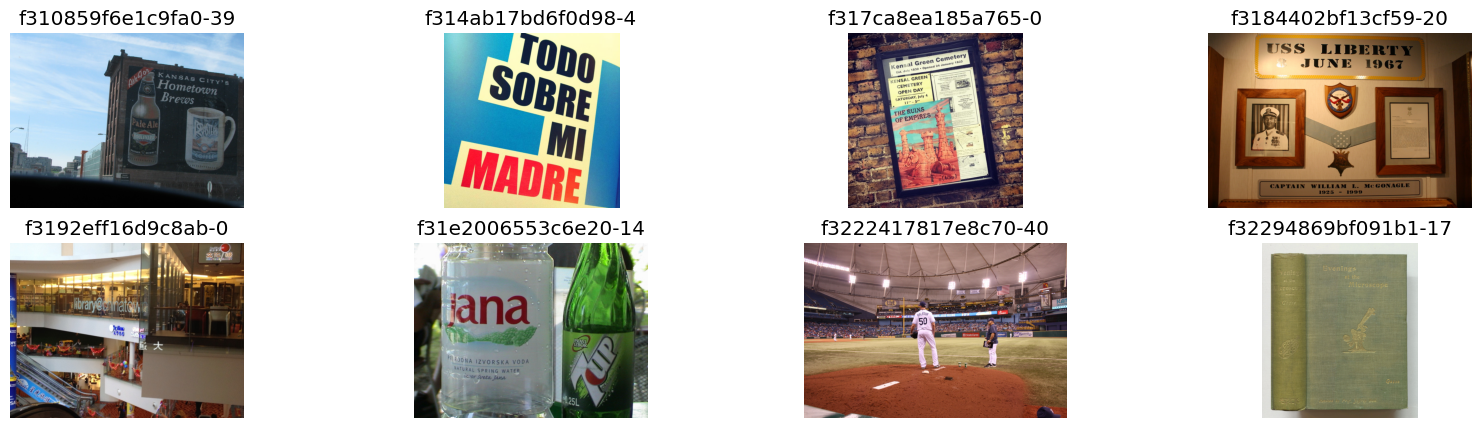

In [44]:
#Create a function to display for the first 8 images
def show_8_images(img_filenames):
  fig,ax=plt.subplots(2,4,figsize=(20,5))
  ax=ax.flatten()
  for i in range(8):
    ax[i].imshow(plt.imread(img_filenames[i]))
    ax[i].axis('off')
    image_id=img_filenames[i].split('/')[-1].split('.')[0]
    n_annot=len(annot.query('image_id==@image_id'))
    ax[i].set_title(f'{image_id}-{n_annot}')
  plt.show()
show_8_images(img_filenames)

##Method 1: pytesseract

In [26]:
import pytesseract

#Example
print(pytesseract.image_to_string(img_filenames[34],lang='eng'))

   

 

 

; |

~ >

HL.

 

 



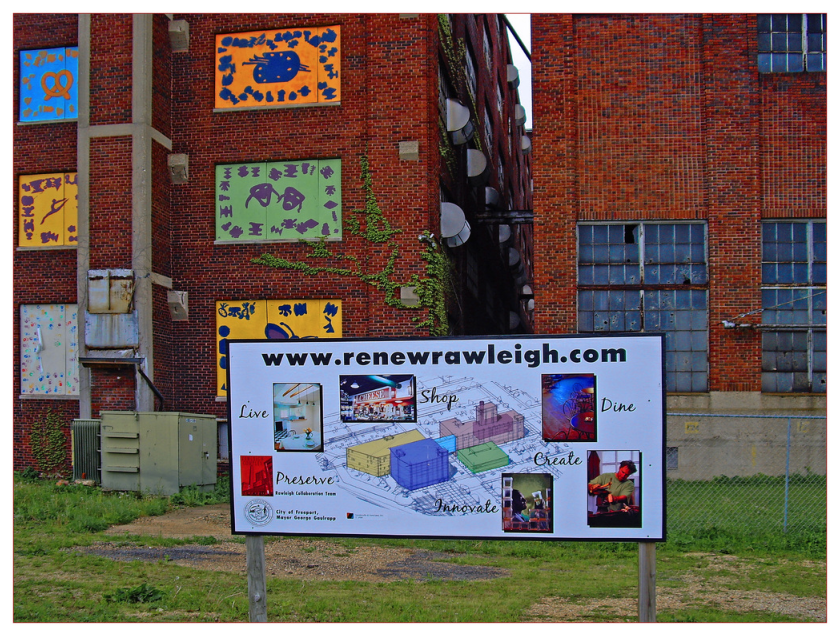

In [27]:
fig,ax=plt.subplots(figsize=(15,8))
plt.imshow(plt.imread(img_filenames[34]))
ax.axis('off')
plt.show()

In [23]:
print(pytesseract.image_to_string('drive/MyDrive/Text Detection/textocr/train_val_images/train_images/3a0594bfb56622fe.jpg',lang='eng'))

Whatisthe What if your
perfect result browser had

for the query five senses?
[what should |

do tomorrow]?

 



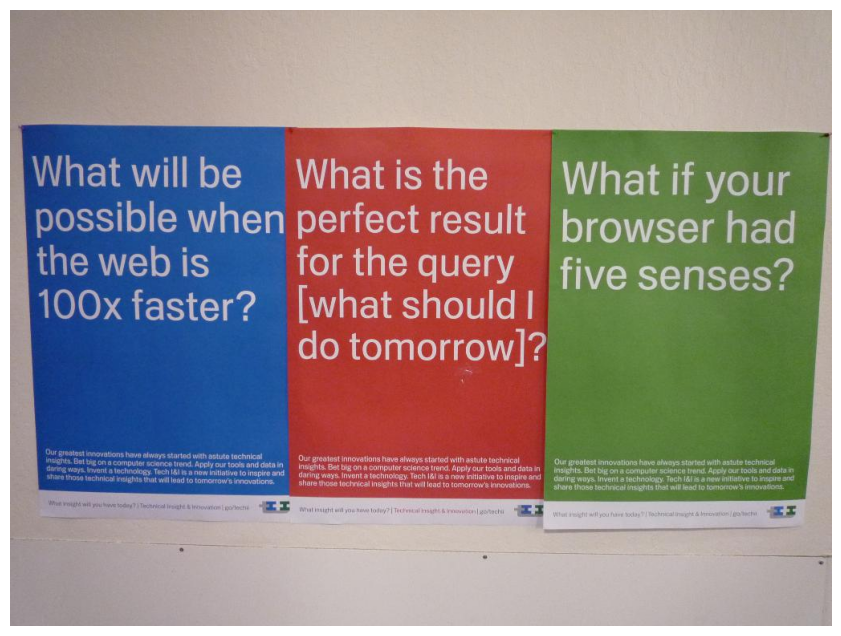

In [22]:
fig,ax=plt.subplots(figsize=(15,8))
plt.imshow(plt.imread('drive/MyDrive/Text Detection/textocr/train_val_images/train_images/3a0594bfb56622fe.jpg'))
ax.axis('off')
plt.show()

##Method 2: easyocr

In [28]:
import easyocr

In [29]:
#Example
reader=easyocr.Reader(['en'],gpu=True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [30]:
res=reader.readtext(img_filenames[10])

In [31]:
pd.DataFrame(res,columns=['bounding_box','text','confidence_level'])

bounding_box  \
0          [[46, 34], [279, 34], [279, 91], [46, 91]]   
1        [[304, 31], [566, 31], [566, 87], [304, 87]]   
2      [[58, 104], [289, 104], [289, 161], [58, 161]]   
3    [[328, 102], [544, 102], [544, 156], [328, 156]]   
4      [[23, 173], [306, 173], [306, 230], [23, 230]]   
5    [[320, 169], [568, 169], [568, 226], [320, 226]]   
6      [[62, 244], [522, 244], [522, 298], [62, 298]]   
7        [[55, 319], [81, 319], [81, 335], [55, 335]]   
8      [[44, 340], [100, 340], [100, 366], [44, 366]]   
9    [[139, 327], [469, 327], [469, 395], [139, 395]]   
10     [[37, 375], [105, 375], [105, 407], [37, 407]]   
11   [[256, 390], [529, 390], [529, 489], [256, 489]]   
12       [[20, 924], [92, 924], [92, 950], [20, 950]]   
13  [[110.93281674430594, 381.04754753622643], [25...   

                               text  confidence_level  
0                     NELSON ALCREN          0.566063  
1                   WILLIAM SAROYAN          0.550838  
2                     thOMAS  WOLFE          0.551395  
3                      CONRAD AIKEN          0.976263  
4                 CARSON  McCULLERS          0.649739  
5                  BUDD   SCHULBERG          0.539009  
6   F; SCOTT  FITZCERALD and others          0.656940  
7                               Won          0.126694  
8                           )pbrery          0.264327  
9                    Great tales gf          0.587922  
10                              35#          0.445429  
11                         Dwellers          0.995659  
12                            LL 53          0.938735  
13                             City          0.749433

In [32]:
res[0]

([[46, 34], [279, 34], [279, 91], [46, 91]],
 'NELSON ALCREN',
 0.5660627805508438)

This contains the bounding box location, the text it identified and a confidence value for it

##Method 3: keras_ocr

In [33]:
import keras_ocr

pipeline=keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5


In [34]:
res=pipeline.recognize([img_filenames[10]])

1/1 [==============================] - 4s 4s/step


In [35]:
pd.DataFrame(res[0],columns=['text','bounding_box'])

text                                       bounding_box
0      saroyan  [[434.54358, 39.04937], [560.8464, 37.245056],...
1      william  [[311.0, 40.0], [425.0, 40.0], [425.0, 79.0], ...
2       algren  [[169.0, 43.0], [272.0, 43.0], [272.0, 82.0], ...
3       nelson  [[52.186775, 46.53753], [157.64354, 43.524467]...
4        aiken  [[457.54248, 109.08946], [538.91406, 107.7555]...
5       conrad  [[335.0, 110.0], [446.0, 110.0], [446.0, 149.0...
6       thomas  [[65.66723, 114.042725], [179.89203, 112.57828...
7        wolfe  [[192.0, 113.0], [284.0, 113.0], [284.0, 151.0...
8    schulberg  [[409.43564, 178.83447], [560.86273, 176.17786...
9     mcullers  [[149.70673, 182.42867], [299.89185, 180.83095...
10        budd  [[326.0, 181.0], [398.0, 181.0], [398.0, 220.0...
11      carson  [[29.556086, 183.81534], [136.85641, 182.2374]...
12  fitzgerald  [[200.74957, 250.46175], [358.86578, 248.84834...
13       scott  [[100.46361, 252.10649], [189.8344, 250.3878],...
14           f  [[67.0, 254.0], [85.0, 254.0], [85.0, 288.0], ...
15      others  [[432.4578, 260.76935], [515.72534, 258.73846]...
16         and  [[375.35608, 262.10718], [427.81073, 260.5644]...
17         ion  [[56.0, 319.0], [79.0, 319.0], [79.0, 333.0], ...
18       great  [[143.0, 332.0], [271.0, 332.0], [271.0, 391.0...
19          of  [[404.0, 332.0], [466.0, 332.0], [466.0, 390.0...
20       tales  [[285.0, 334.0], [389.0, 334.0], [389.0, 381.0...
21         bur  [[54.0, 346.0], [97.0, 346.0], [97.0, 364.0], ...
22          sa  [[37.0, 379.0], [76.0, 379.0], [76.0, 399.0], ...
23    dwellers  [[265.48547, 402.385], [518.79443, 406.5376], ...
24        city  [[113.462875, 400.5284], [236.14845, 416.8865]...
25          ll  [[23.0, 929.0], [52.0, 929.0], [52.0, 948.0], ...
26          ss  [[57.0, 929.0], [90.0, 929.0], [90.0, 947.0], ...

<Axes: >

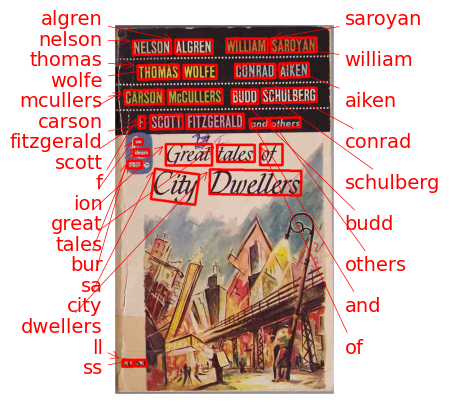

In [36]:
keras_ocr.tools.drawAnnotations(plt.imread(img_filenames[10]),res[0])

##Comparing easyocr and keras_ocr

In [37]:
#easy ocr
dfs=[]
for img in tqdm(img_filenames[:25]):
  ocr_res=reader.readtext(img)
  img_id=img.split('/')[-1].split('.')[0]
  img_df=pd.DataFrame(ocr_res,columns=['bounding_box','text','confidence'])
  img_df['img_id']=img_id
  dfs.append(img_df)
easyocr_df=pd.concat(dfs)

  0%|          | 0/25 [00:00<?, ?it/s]

In [38]:
easyocr_df

bounding_box      text  confidence  \
0    [[597, 379], [653, 379], [653, 423], [597, 423]]      Ale]    0.515525   
1    [[535, 439], [637, 439], [637, 475], [535, 475]]  Lovtrvan    0.072629   
2    [[592, 518], [631, 518], [631, 532], [592, 532]]   DBEwing    0.050757   
3    [[804, 524], [901, 524], [901, 560], [804, 560]]    COFFEL    0.483484   
4   [[500.9594617776757, 212.1094703550758], [594....     AskQo    0.584228   
..                                                ...       ...         ...   
42  [[584.3167184270003, 666.6583592135001], [664....   Chewll     0.766370   
43  [[544.3615361589619, 660.8530753112733], [579....    Fruit     0.745146   
44  [[521.9819816180111, 682.7801797798122], [590....     Gotta    0.999863   
45  [[237.46153846153845, 823.3076923076923], [305...     Julce    0.501431   
46  [[277.41000317999044, 878.4560050879847], [337...         S    0.040710   

              img_id  
0   f310859f6e1c9fa0  
1   f310859f6e1c9fa0  
2   f310859f6e1c9fa0  
3   f310859f6e1c9fa0  
4   f310859f6e1c9fa0  
..               ...  
42  f3603defd8fa6387  
43  f3603defd8fa6387  
44  f3603defd8fa6387  
45  f3603defd8fa6387  
46  f3603defd8fa6387  

[267 rows x 4 columns]

In [39]:
%%time
#keras_ocr
pipeline=keras_ocr.pipeline.Pipeline()

dfs=[]
for img in tqdm(img_filenames[:25]):
  keras_ocr_results=pipeline.recognize([img])
  keras_ocr_res=keras_ocr_results[0]
  img_id=img.split('/')[-1].split('.')[0]
  img_df=pd.DataFrame(keras_ocr_res,columns=['text','bounding_box'])
  img_df['img_id']=img_id
  dfs.append(img_df)
keras_ocr_df=pd.concat(dfs)

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


  0%|          | 0/25 [00:00<?, ?it/s]

1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 1s 521ms/step


3/3 [==============================] - 2s 1s/step
CPU times: user 3min 33s, sys: 5.3 s, total: 3min 39s
Wall time: 4min 37s


##Plot Results: easyocr vs keras_ocr

In [40]:
img_id=img_filenames[0].split('/')[-1].split('.')[0]
img_id

'f310859f6e1c9fa0'

In [41]:
def plot_compare(img_fn, easyocr_df, kerasocr_df):
    img_id = img_fn.split('/')[-1].split('.')[0]
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))

    easy_results = easyocr_df.query('img_id == @img_id')[['text','bounding_box']].values.tolist()
    easy_results = [(x[0], np.array(x[1])) for x in easy_results]
    keras_ocr.tools.drawAnnotations(plt.imread(img_fn),
                                    easy_results, ax=axs[0])
    axs[0].set_title('easyocr results', fontsize=24)

    keras_results = keras_ocr_df.query('img_id == @img_id')[['text','bounding_box']].values.tolist()
    keras_results = [(x[0], np.array(x[1])) for x in keras_results]
    keras_ocr.tools.drawAnnotations(plt.imread(img_fn),
                                    keras_results, ax=axs[1])
    axs[1].set_title('keras_ocr results', fontsize=24)
    plt.show()

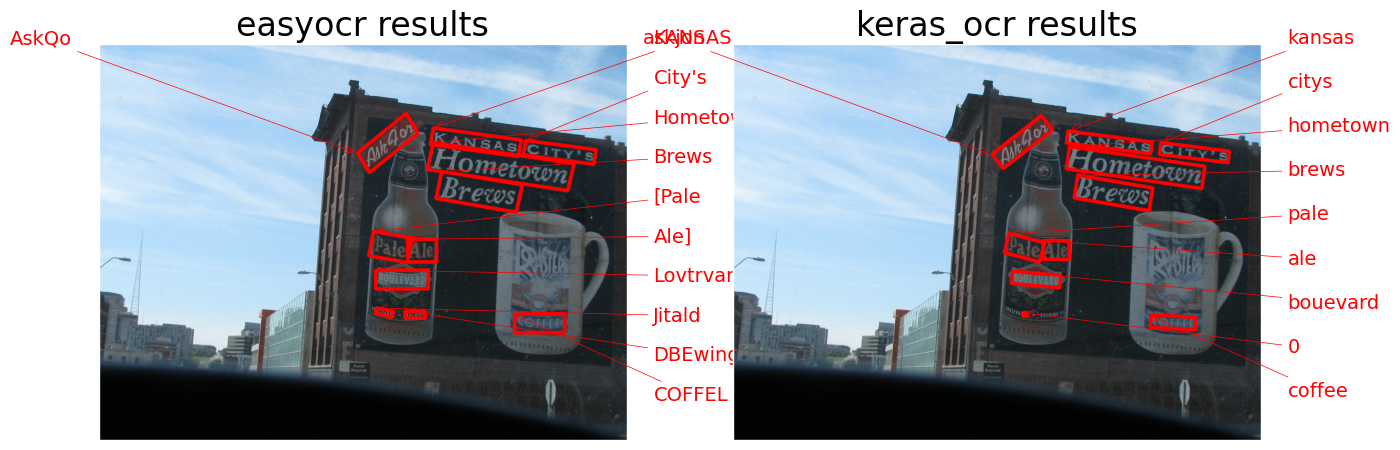

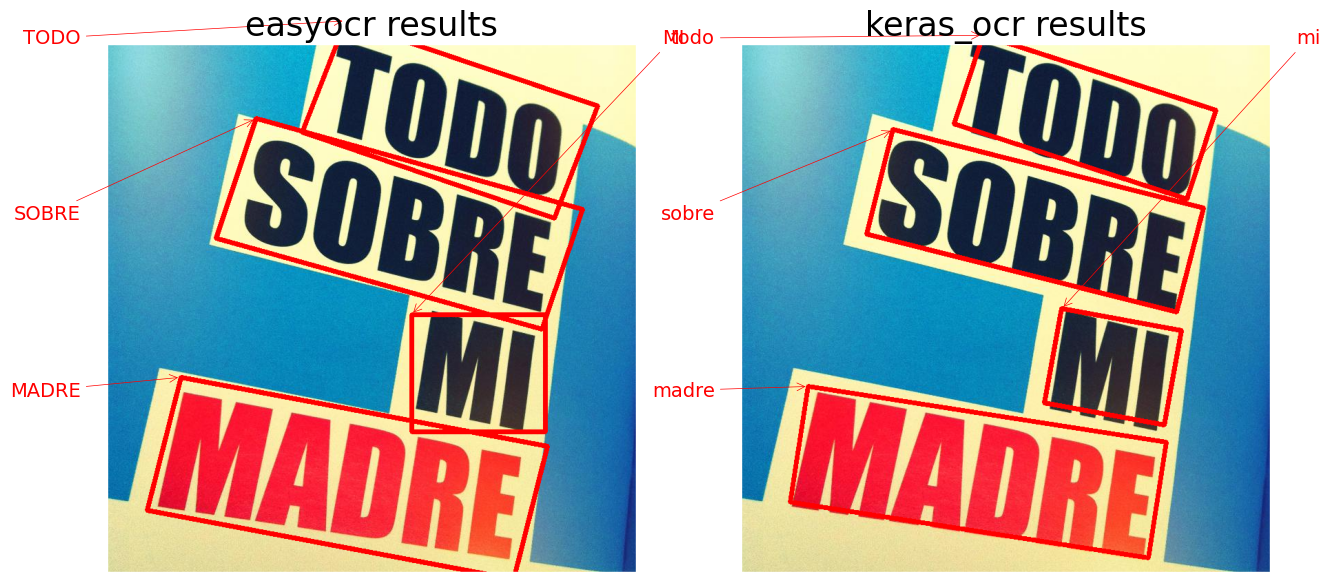

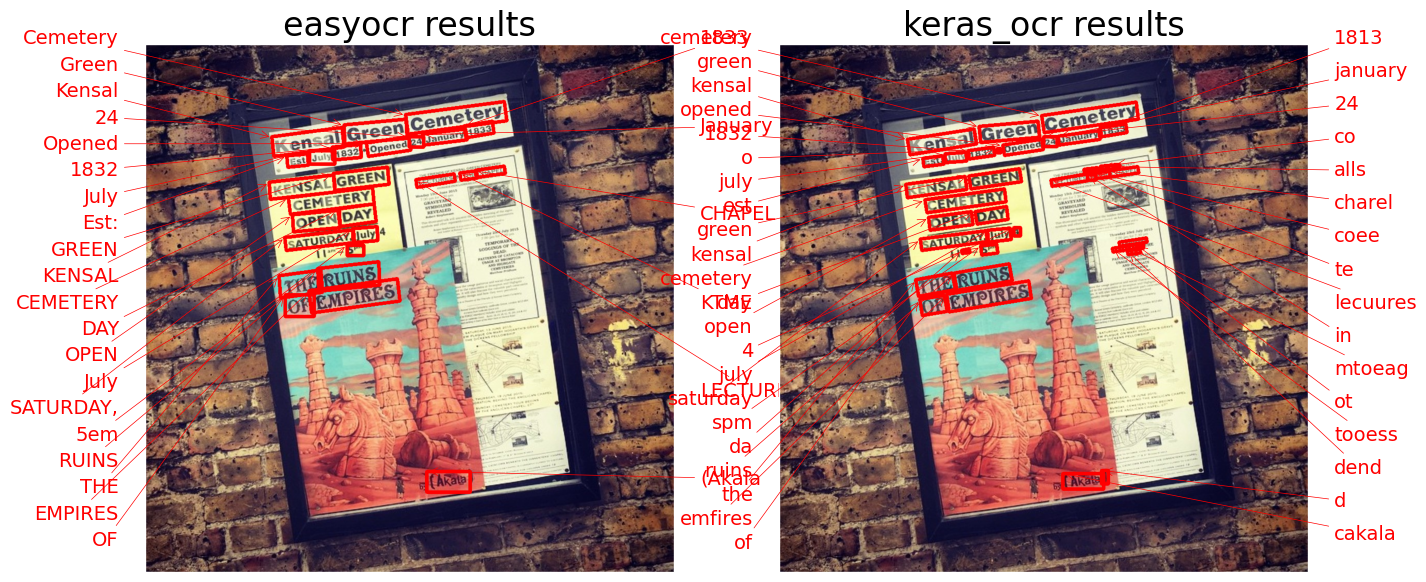

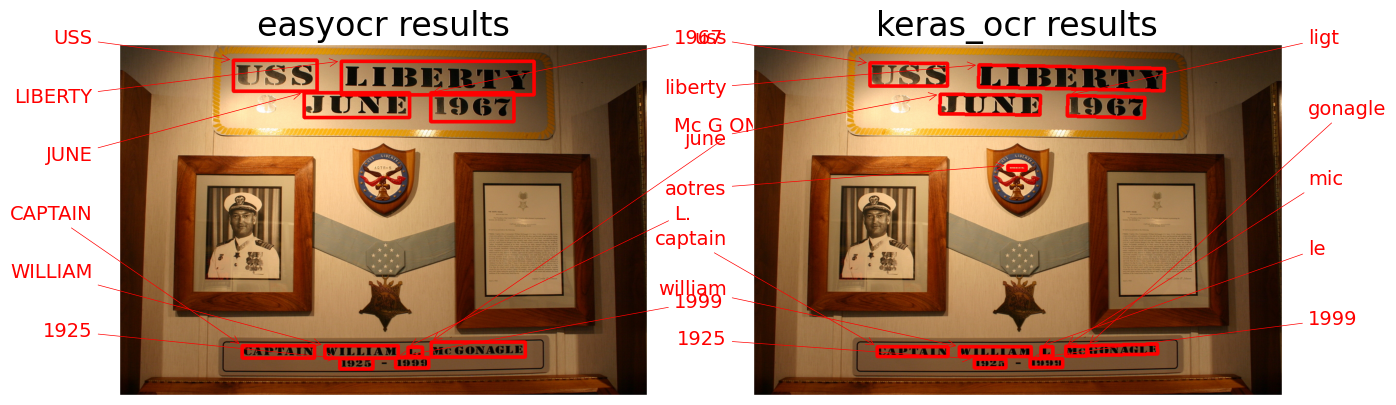

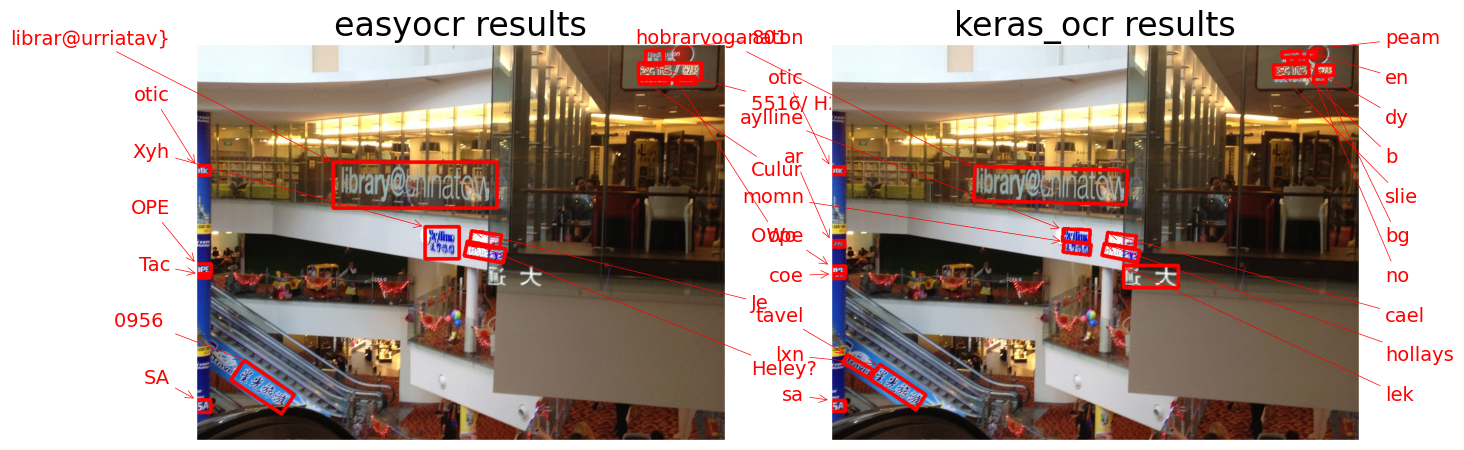

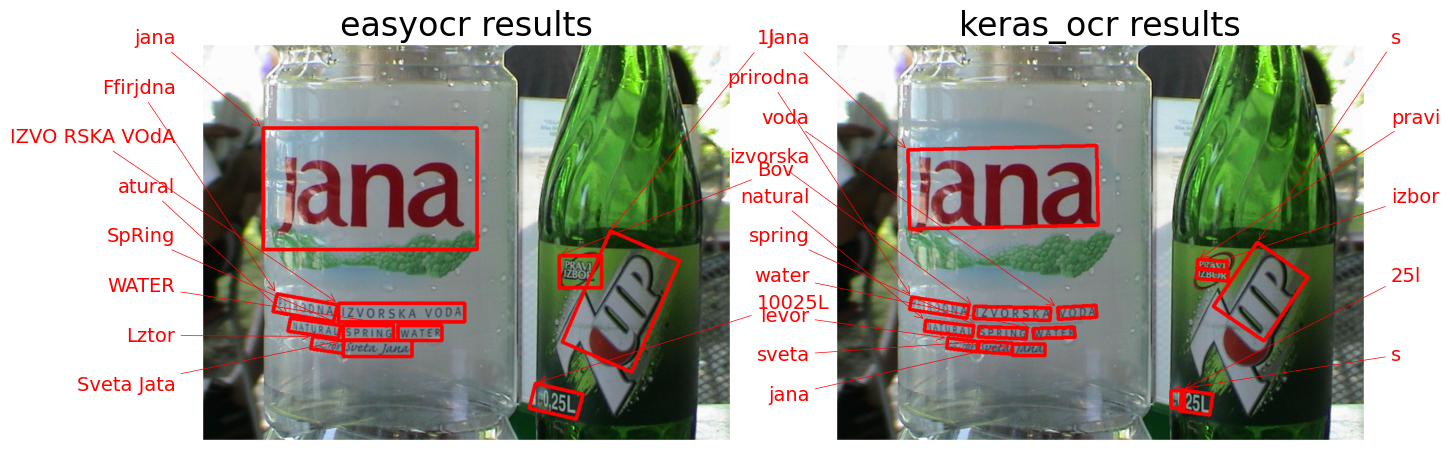

In [43]:
for img in img_filenames[:6]:
  plot_compare(img,easyocr_df,keras_ocr_df)